# Glass_Classification(with R)- KNN 98.4%

### Importing database.

In [1]:
library(tidyverse)
base_glass<-read_csv("../input/glass/glass.csv")
head(base_glass)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


── Column specification ────────────────────────────────────────────────────────
cols(
  RI = col_double(),
  Na = col_double(),
  Mg = col_double(),
  Al = col_double(),
  Si = col_double(),
  K = col_double(),
  Ca = col_double(),
  Ba = col_double(),
  Fe = col_double(),
  Type = col_double()
)




RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


### Naming the Attributes.

In [2]:
names(base_glass)<-c("refractive index","sodium","magnesium","aluminium","silicon","potassium","calcium","barium","iron","type of glass")
head(base_glass,5)

refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type of glass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0,1


### Transform "type of glass" into a categorical variable.

In [3]:
base_glass$`type of glass`<-as_factor(base_glass$`type of glass`)
base_glass$`type of glass`

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
[149] 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
[186] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
Levels: 1 2 3 5 6 7

### Check for missing values.

In [4]:
sum(is.na(base_glass))

[1] 0

### Summary of attributes.

In [5]:
summary(base_glass)

 refractive index     sodium        magnesium       aluminium    
 Min.   :1.511    Min.   :10.73   Min.   :0.000   Min.   :0.290  
 1st Qu.:1.517    1st Qu.:12.91   1st Qu.:2.115   1st Qu.:1.190  
 Median :1.518    Median :13.30   Median :3.480   Median :1.360  
 Mean   :1.518    Mean   :13.41   Mean   :2.685   Mean   :1.445  
 3rd Qu.:1.519    3rd Qu.:13.82   3rd Qu.:3.600   3rd Qu.:1.630  
 Max.   :1.534    Max.   :17.38   Max.   :4.490   Max.   :3.500  
    silicon        potassium         calcium           barium     
 Min.   :69.81   Min.   :0.0000   Min.   : 5.430   Min.   :0.000  
 1st Qu.:72.28   1st Qu.:0.1225   1st Qu.: 8.240   1st Qu.:0.000  
 Median :72.79   Median :0.5550   Median : 8.600   Median :0.000  
 Mean   :72.65   Mean   :0.4971   Mean   : 8.957   Mean   :0.175  
 3rd Qu.:73.09   3rd Qu.:0.6100   3rd Qu.: 9.172   3rd Qu.:0.000  
 Max.   :75.41   Max.   :6.2100   Max.   :16.190   Max.   :3.150  
      iron         type of glass
 Min.   :0.00000   1:70         
 1s

##  Is there a correlation between the attributes?


In [6]:
cor_base_glass<-cor(base_glass[,1:9])
cor_base_glass

,refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron
refractive index,1.0000000000,-0.19188538,-0.122274039,-0.40732603,-0.54205220,-0.289832711,0.8104027,-0.0003860189,0.143009609
sodium,-0.1918853790,1.00000000,-0.273731961,0.15679367,-0.06980881,-0.266086504,-0.2754425,0.3266028795,-0.241346411
magnesium,-0.1222740393,-0.27373196,1.000000000,-0.48179851,-0.16592672,0.005395667,-0.4437500,-0.4922621178,0.083059529
aluminium,-0.4073260341,0.15679367,-0.481798509,1.00000000,-0.00552372,0.325958446,-0.2595920,0.4794039017,-0.074402151
silicon,-0.5420521997,-0.06980881,-0.165926723,-0.00552372,1.00000000,-0.193330854,-0.2087322,-0.1021513105,-0.094200731
potassium,-0.2898327111,-0.26608650,0.005395667,0.32595845,-0.19333085,1.000000000,-0.3178362,-0.0426180594,-0.007719049
calcium,0.8104026963,-0.27544249,-0.443750026,-0.25959201,-0.20873215,-0.317836155,1.0000000,-0.1128409671,0.124968219
barium,-0.0003860189,0.32660288,-0.492262118,0.47940390,-0.10215131,-0.042618059,-0.1128410,1.0000000000,-0.058691755
iron,0.1430096093,-0.24134641,0.083059529,-0.07440215,-0.09420073,-0.007719049,0.1249682,-0.0586917554,1.000000000


###  VISUALIZING THE CORRELATION BETWEEN ATTRIBUTES.

corrplot 0.84 loaded



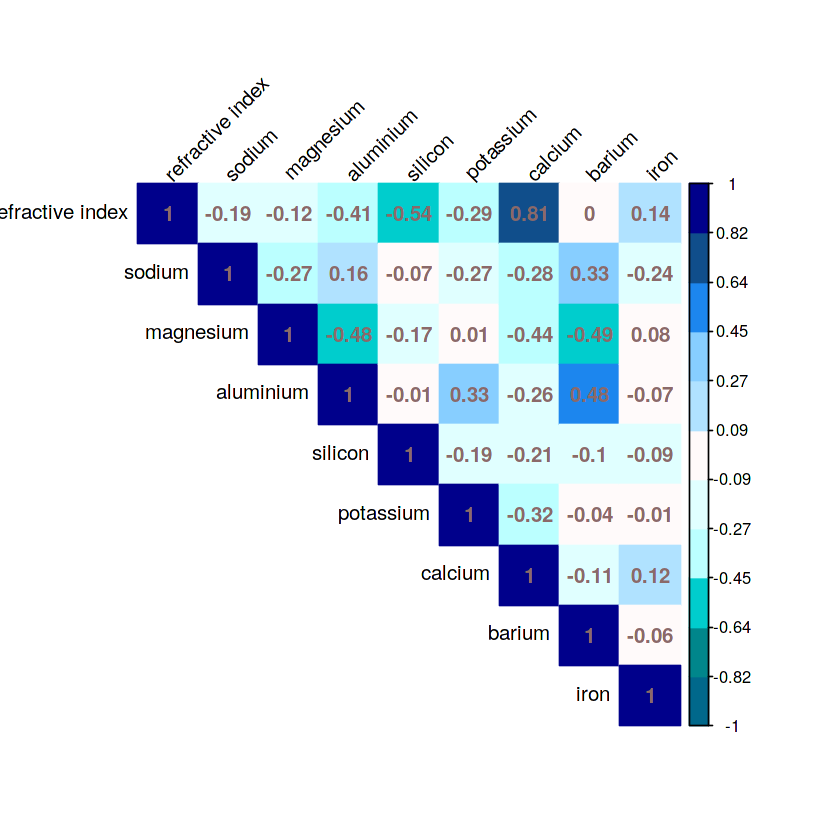

In [7]:
library(corrplot)

corrplot(cor_base_glass,method = "color",type = "upper",tl.srt = 45,tl.col = "black",addCoef.col = "#8B6969",col=c("#00688B","#00868B","#00CDCD","#BBFFFF","#E0FFFF","#FFFAFA","#B0E2FF","#87CEFF","#1C86EE","#104E8B","#00008B"))

## Greater and lesser correlation between attributes.


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




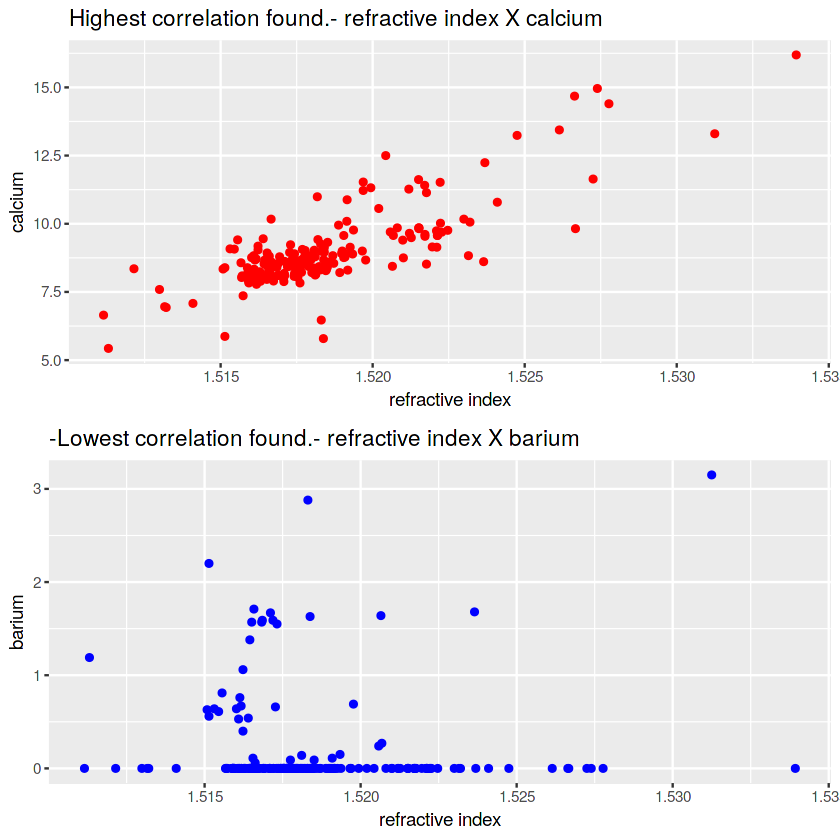

In [8]:
library(gridExtra)
### Maior correlçao encontrada  refractive index X calcium
maior_cor<-base_glass %>%
    ggplot()+
        geom_point(mapping = aes(x = `refractive index`,y = calcium),color="red")+
          ggtitle("Highest correlation found.- refractive index X calcium")

### Menor correlçao encontrada  refractive index X calcium
menor_cor<-base_glass %>%
    ggplot()+
    geom_point(mapping = aes(x =`refractive index`,y = barium ),color="blue")+
    ggtitle("-Lowest correlation found.- refractive index X barium")

grid.arrange(maior_cor,menor_cor)
        

## Graph with the distribution of the types of glasses.

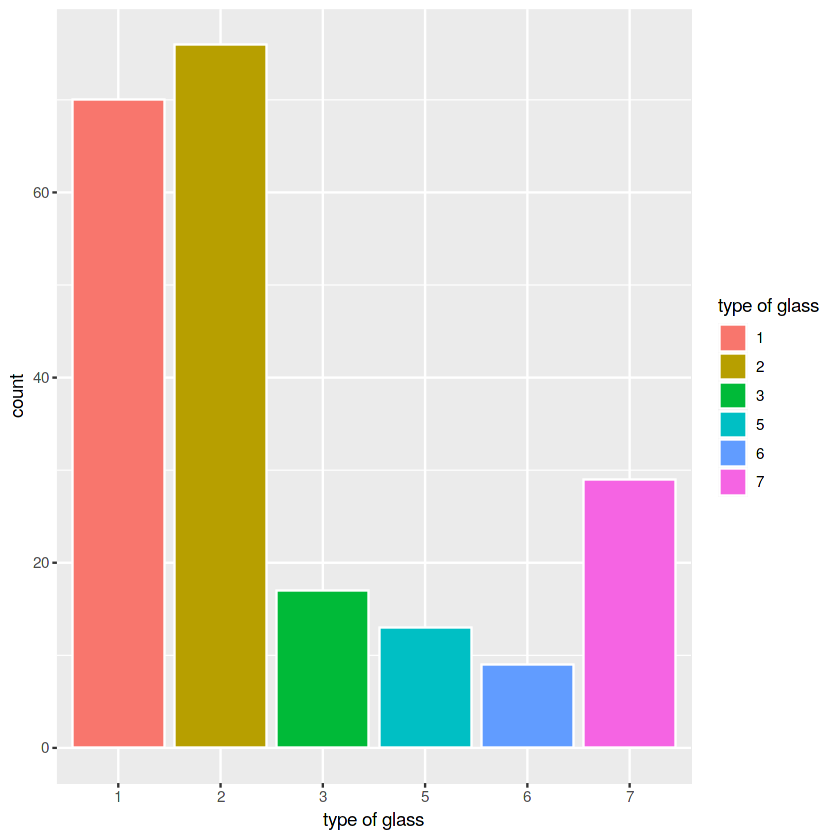

In [9]:
base_glass %>% 
    ggplot()+
        geom_bar(mapping = aes(x = `type of glass`,fill=`type of glass`),color="white")


## Pre-processing.

In [10]:
head(base_glass)

refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type of glass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


### Standardization of attributes. Using staggering. scale ().

In [11]:
### usando a funçao scale()

base_glass[,1:9]<-scale(base_glass[,-10])
head(base_glass)

refractive index,sodium,magnesium,aluminium,silicon,potassium,calcium,barium,iron,type of glass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.8708258,0.2842867,1.2517037,-0.6908222,-1.12444556,-0.67013422,-0.1454254,-0.3520514,-0.5850791,1
-0.2487502,0.5904328,0.6346799,-0.1700615,0.10207972,-0.02615193,-0.7918771,-0.3520514,-0.5850791,1
-0.7196308,0.1495824,0.6000157,0.1904651,0.43776033,-0.16414813,-0.8270103,-0.3520514,-0.5850791,1
-0.2322859,-0.2422846,0.6970756,-0.3102663,-0.05284979,0.11184428,-0.5178378,-0.3520514,-0.5850791,1
-0.3113148,-0.1688095,0.6485456,-0.4104126,0.55395746,0.08117845,-0.6232375,-0.3520514,-0.5850791,1
-0.7920739,-0.7566101,0.6416128,0.3506992,0.41193874,0.21917466,-0.6232375,-0.3520514,2.0832652,1


## Split database.

In [12]:
library(caTools)
set.seed(100)
dividir<-sample.split(Y = base_glass$`type of glass`,SplitRatio = 0.70 )
base_treinamento<-subset(x = base_glass,subset = dividir == TRUE)
base_teste<-subset(x = base_glass,subset = dividir == FALSE)

## Using KNN algorithm for forecasting.

In [13]:
library(class)
previsaoKNN<-knn(train = base_treinamento,test = base_teste,cl = base_treinamento$`type of glass`,k = 1)
head(previsaoKNN,20)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
Levels: 1 2 3 5 6 7

## Forecast accuracy.

In [14]:
library(caret)
matriz_confusao<-table(previsaoKNN,base_teste$`type of glass`)

confusionMatrix(matriz_confusao)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Confusion Matrix and Statistics

           
previsaoKNN  1  2  3  5  6  7
          1 21  0  0  0  0  0
          2  0 23  0  0  0  0
          3  0  0  5  0  0  0
          5  0  0  0  4  0  1
          6  0  0  0  0  3  0
          7  0  0  0  0  0  8

Overall Statistics
                                          
               Accuracy : 0.9846          
                 95% CI : (0.9172, 0.9996)
    No Information Rate : 0.3538          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9792          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            1.0000   1.0000  1.00000  1.00000  1.00000   0.8889
Specificity            1.0000   1.0000  1.00000  0.98361  1.00000   1.0000
Pos Pred Value         1.0000   1.0000  1.00000  0.80000  1.00000   1.0000
Neg Pred Value 

## With KNN algorithm using k = 1, we obtain an accuracy of 98.4%.

In [15]:
## Base teste
graf_base_teste<-base_teste %>% 
    ggplot()+
        geom_bar(mapping = aes(x = `type of glass`,fill=`type of glass`),color="white")+
                ylim(0,30)+
           ggtitle(label = "BASE TESTE") 
## Base teste
previsaoKNN<-as_tibble(previsaoKNN) 
names(previsaoKNN)<-c("type of glass")

graf_previsaoKNN<-previsaoKNN %>%
        ggplot()+
         geom_bar(mapping = aes(x = `type of glass`,fill=`type of glass`),color="white")+
                ylim(0,30)+
                   ggtitle(label = "PREVISAO KNN -98.4%") 

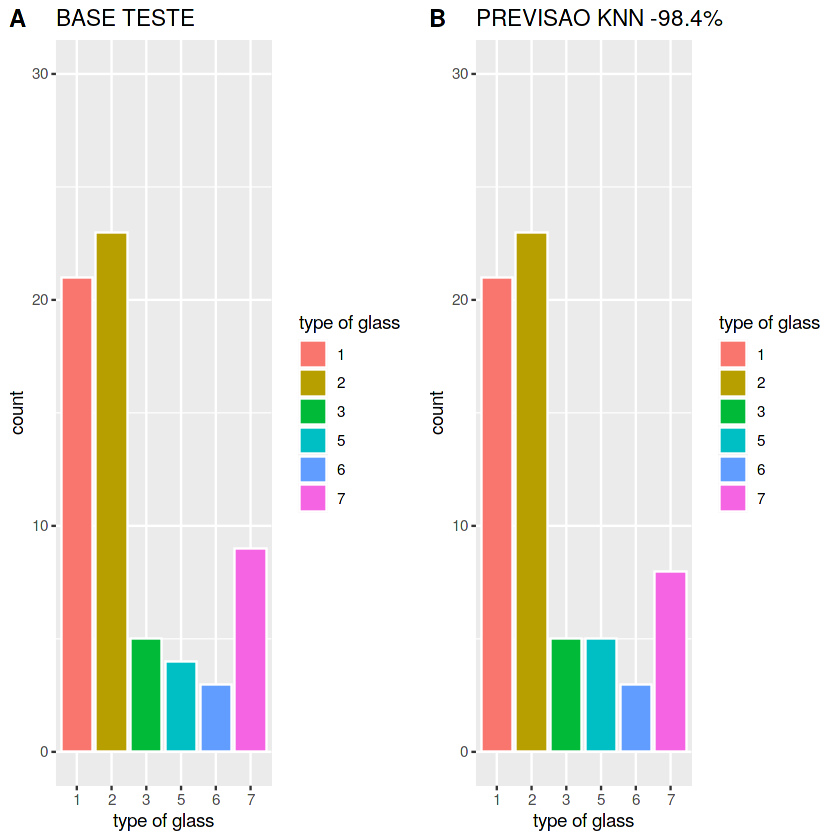

In [16]:
library(cowplot) ### pacete tem função que permite plotar graficos ggplot lado alado
plot_grid(graf_base_teste,graf_previsaoKNN,labels = "AUTO")

### Another way to put charts in comparison.

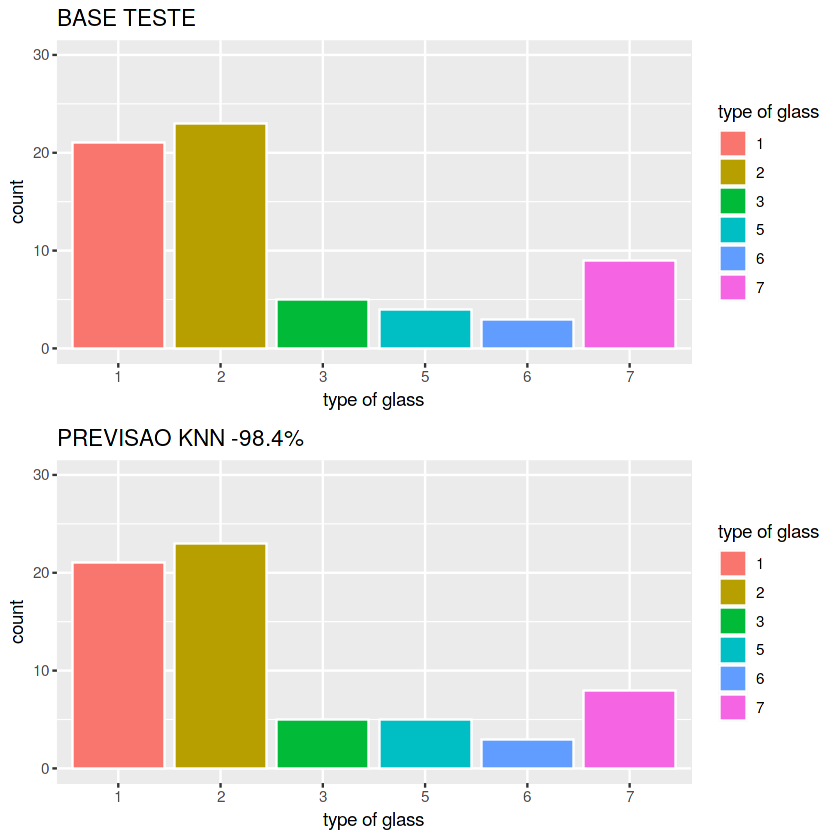

In [17]:
library(gridExtra)
grid.arrange(graf_base_teste,graf_previsaoKNN) #dplyr